In [7]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as stats

In [441]:
eps = 10**-9
k = np.linspace(stats.norm.ppf(eps,scale=2), stats.norm.ppf(1-eps,scale=2), 2**5)
pdf_0_t1 = stats.norm.pdf(k, scale=1)
pdf_0_t2 = stats.norm.pdf(k, scale=2)

<IPython.core.display.Javascript object>


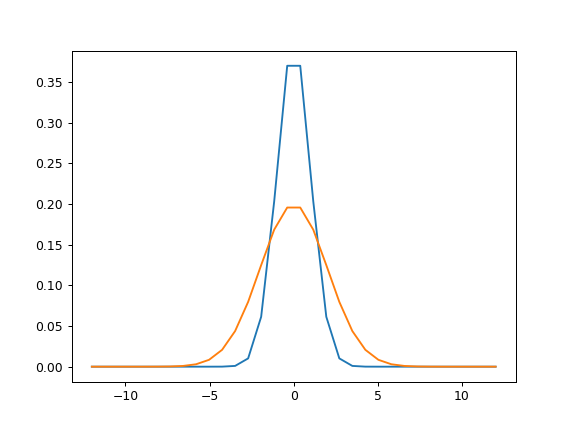

In [442]:
plt.figure()
plt.plot(k, pdf_0_t1, label='0-t1')
plt.plot(k, pdf_0_t2, label='0-t2')

In [443]:
PDF_0_t1 = np.fft.fft(pdf_0_t1)
PDF_0_t2 = np.fft.fft(pdf_0_t2)
PDF_t1_t2 = PDF_0_t2 / PDF_0_t1 
pdf_t1_t2 = np.fft.ifft(PDF_t1_t2)

<IPython.core.display.Javascript object>


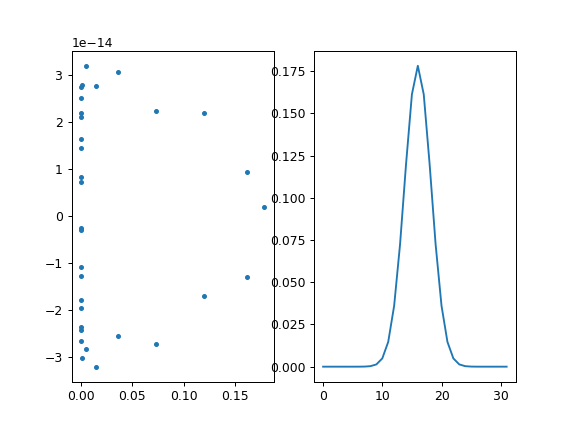

In [444]:
plt.figure()
plt.subplot(121)
plt.plot(pdf_t1_t2.real, pdf_t1_t2.imag, ls='', marker='.')
plt.subplot(122)
shifter = int(len(pdf_t1_t2)/2)
pdf_t1_t2_roll = np.roll(pdf_t1_t2, shifter)
plt.plot(np.abs(pdf_t1_t2_roll))

<IPython.core.display.Javascript object>


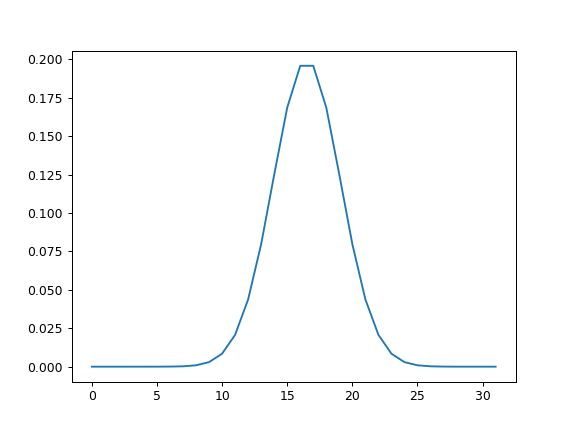

C:\Users\Jon\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [445]:
plt.figure()
plt.plot(np.convolve(pdf_0_t1, pdf_t1_t2_roll, mode='same'))

<IPython.core.display.Javascript object>


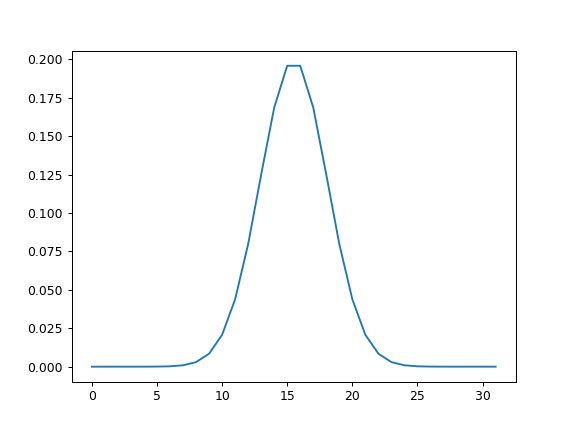

In [446]:
plt.figure()
plt.plot(np.abs(np.fft.ifft(np.fft.fft(pdf_t1_t2) * PDF_0_t1)))